## Задача 1

In [150]:
import pandas as pd 
import numpy as np
import scipy.stats as sts
import math
from scipy.stats import norm, t, ttest_ind
import itertools
from statsmodels. stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

### а)

Запишем функцию L максимального правдоподобия. Вероятность приезда уникального таксиста на втором заказе - $\frac{n-1}{n}$ , на втором заказе - $\frac{n-2}{n}$, итд ...

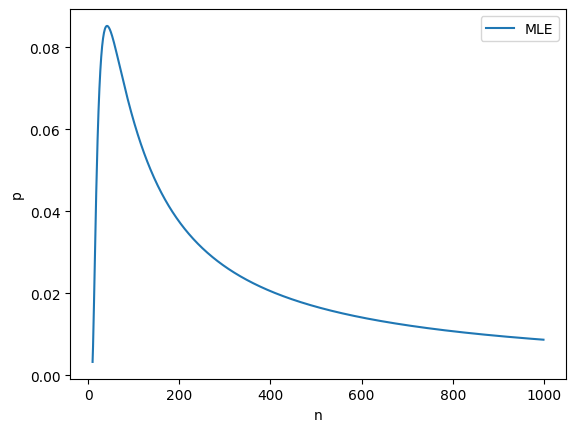

MLE: 42


In [151]:
def L(n, d=10):
    res = 1
    for i in range(d - 1):
        res *= (n - i) / n
    res *= (d - 1) / n
    return res

l1 = []

for i in range(10, 1000):
    l1.append(L(i, 10))
    
plt.plot(range(10, 1000), l1, label='MLE')
plt.legend()
plt.xlabel('n')
plt.ylabel('p')
plt.show()

max_val = [0, 0]
for i in range(100):
    if l1[i] > max_val[0]:
        max_val[0] = l1[i]
        max_val[1] = i + 10 

print('MLE:', max_val[1])

### б)


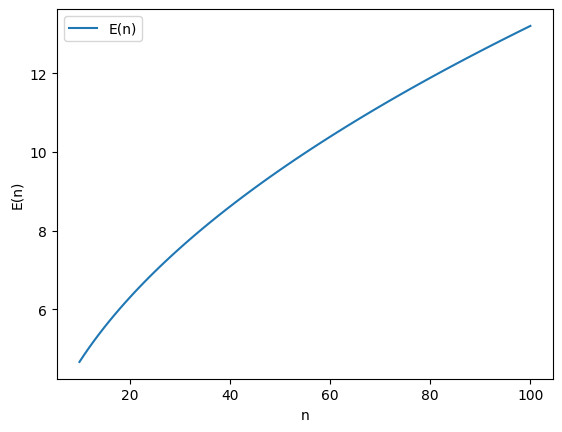

MM: 55


In [152]:
def E(n):
    res = 0
    for i in range(1, n + 2):
        res += L(n, i) * i
    return res


l2 = []

for i in range(10, 101):
    l2.append(E(i))
    
plt.plot(range(10, 101), l2, label='E(n)')
plt.legend()
plt.xlabel('n')
plt.ylabel('E(n)')
plt.show()

mm = np.array([])

for i in range(10, 101):
    mm = np.append(mm, abs(E(i) - 10))
    
print('MM:',  range(10, 101)[np.argmin(mm)])

### в)

MM:

In [153]:
vals = []

np.random.seed(41)
for i in range(10000):
    bool_arr = [False]*100
    for j in range(101):
        cur = np.random.choice(range(100))
        if bool_arr[cur]:
            vals.append(j + 1)
            break
        else:
            bool_arr[cur] += 1

In [154]:
mm_l3 = np.vectorize(E)
mm_l3 = mm_l3(range(1, 1000))
vals = np.array(vals)
mm_l3 = np.absolute(vals[:, np.newaxis] - mm_l3)
for i in range(len(mm_l3)):
    mm_l3[i] = np.argmin(mm_l3[i]) + 1
print('mm:', mm_l3.mean())

mm: 123.284


In [155]:
print('STD', mm_l3.std(), '\nVAR',mm_l3.std()**2, '\nMEAN', mm_l3.mean(),  '\nBIAS', abs(mm_l3.mean() - 100))


STD 114.89350261872954 
VAR 13200.516944000012 
MEAN 123.284 
BIAS 23.284000000000006


1


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  1.  ,   7.24,  13.48,  19.72,  25.96,  32.2 ,  38.44,  44.68,
         50.92,  57.16,  63.4 ,  69.64,  75.88,  82.12,  88.36,  94.6 ,
        100.84, 107.08, 113.32, 119.56, 125.8 , 132.04, 138.28, 144.52,
        150.76, 157.  , 163.24, 169.48, 175.72, 181.96, 188.2 , 194.44,
        200.68, 206.92, 213.16, 219.4 , 225.64, 231.88, 238.12, 244.36,
        250.6 , 256.84, 263.08, 269.32, 275.56, 281.8 , 288.04, 294.28,
        300.52, 306.76, 313.  , 319.24, 325.48, 331.72, 337.96, 344.2 ,
        350.44, 356.68, 362.92, 369.16, 375.4 , 381.64, 387.88, 394.12,
        400.36, 406.6 , 412.84, 419.08, 425.32, 431.56, 437.8 , 444.04,
        450.28, 456.52, 462.76, 469.  , 475.24, 481.48, 487.72, 493.96,
        500.2 , 506.44, 512.68,

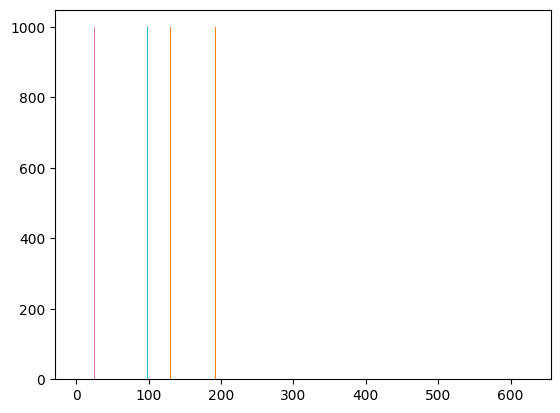

In [156]:
print(1)
plt.hist(list(mm_l3)[:200], bins = 100)

## Задача 2

### а)

Вероятность имеет вид: произведения только уникальных имен $\frac{n-i}{n}$ по количеству уникальных имен - 1. Вероятность встретить повторяющееся имя $=\frac{i}{n}$

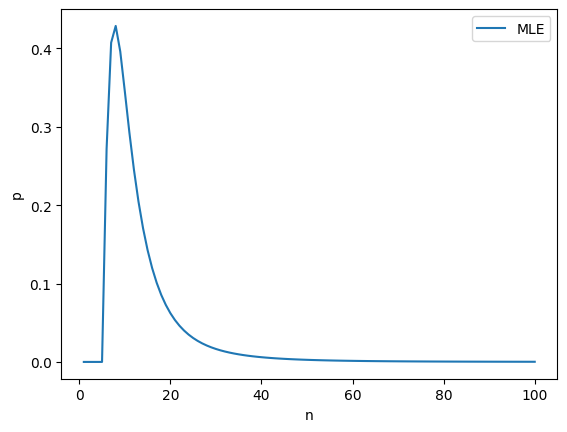

MLE: 8


In [157]:
def L_2(n, n_unique, d):
    res = 1
    cnt = 0

    for i in range(1, n_unique):
        res *= (n-i)/n

    combs = itertools.combinations_with_replacement(np.arange(1, n_unique+1), d - n_unique)

    for el in combs:
        temp = 1
        
        for i in range(d - n_unique):
            temp *= el[i]

        cnt += temp
    res *= (cnt/(n**(d - n_unique)))
    return res 

l3 = []

for i in range(1, 101):
    l3.append(L_2(i, 6, 10))
    
plt.plot(range(1, 101), l3, label='MLE')
plt.legend()
plt.xlabel('n')
plt.ylabel('p')
plt.show()

max_val = [0, 0]
for i in range(100):
    if l3[i] > max_val[0]:
        max_val[0] = l3[i]
        max_val[1] = i + 1 

print('MLE:', max_val[1])

### б)

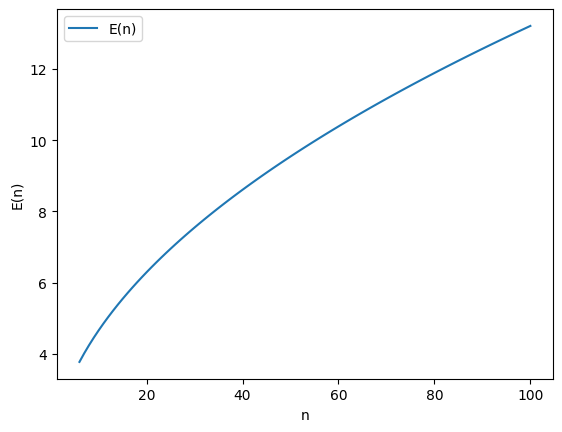

MM: 8


In [158]:
def E_2(n, n_unique, d=10):
    res = 0
    for i in range(d):
        res += L_2(n, n_unique, d)
    return res


l4 = []

for i in range(6, 101):
    l4.append(E(i))
    
plt.plot(range(6, 101), l4, label='E(n)')
plt.legend()
plt.xlabel('n')
plt.ylabel('E(n)')
plt.show()

mm = np.array([])

for i in range(6, 101):
    mm = np.append(mm, abs(E_2(i, 6, 10) - 6))
    
print('MM:',  range(6, 101)[np.argmin(mm)])

### в)

In [159]:
vals2 = []

np.random.seed(41)
for i in range(10000):
    bool_arr = [False]*20
    for j in range(10):
        cur = np.random.choice(range(20))
        if j == 9:
            vals2.append(9)
            break
        if bool_arr[cur]:
            vals2.append(j + 1)
            break
        else:
            bool_arr[cur] += 1

In [161]:
mm_l2 = np.vectorize(E_2)

vals2 = np.array(vals2)
mm_l2 = mm_l2(range(1,1000), 10)
mm_l2 = np.absolute(vals2[:, np.newaxis] - mm_l2)
for i in range(len(mm_l2)):
    mm_l2[i] = np.argmin(mm_l2[i]) + 1
print('mm:', mm_l2.mean())

mm: 157.6758


In [162]:
print('STD', mm_l2.std(), '\nVAR',mm_l2.std()**2, '\nMEAN', mm_l2.mean(),  '\nBIAS', abs(mm_l2.mean() - 20))


STD 141.23597804511422 
VAR 19947.601494359988 
MEAN 157.6758 
BIAS 137.6758


## Задача 3

In [163]:
np.random.seed(33)
samples = np.random.exponential(scale=1, size=(10000, 20))

Асимптотический нормальный интервал

In [165]:
l = 0

for sample in samples:
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)

    z_alpha = norm.ppf(0.975)
    ci_classic = (sample_mean - z_alpha * sample_std / np.sqrt(len(sample)),
                 sample_mean + z_alpha * sample_std / np.sqrt(len(sample)))
    
    l += np.mean((ci_classic[0] <= 1) & (1 <= ci_classic[1]))

l/10000

0.9056

Наивный бутстрап

In [166]:
l = 0

for sample in samples:
    bootstrapped_means = np.random.choice(sample, size=(10**4, len(sample)), replace=True).mean(axis=1)
    ci_bootstrap_naive = np.percentile(bootstrapped_means, [2.5, 97.5])
    in_ci_bootstrap_naive = (ci_bootstrap_naive[0] <= 1 <= ci_bootstrap_naive[1])
    prob_in_ci_bootstrap_naive = in_ci_bootstrap_naive.mean()
    l += prob_in_ci_bootstrap_naive

l/10000

0.9053

Бутстрап t-статистики

In [167]:
l = 0

for sample in samples:
    t = sts.t.ppf(0.975, df=len(sample)-1)
    bootstrapped_t = (np.random.choice(sample, size=(n_bootstraps, len(sample)), replace=True) - np.mean(sample)) / np.std(sample, ddof=1)
    bootstrapped_t_means = bootstrapped_t.mean(axis=1)
    ci_bootstrap_t = (np.mean(sample) - t * np.std(bootstrapped_t_means, ddof=1), np.mean(sample) + t * np.std(bootstrapped_t_means, ddof=1))
    in_ci_bootstrap_t = (ci_bootstrap_t[0] <= 1 <= ci_bootstrap_t[1])
    l += in_ci_bootstrap_t.mean()
    
l/10000

0.9603

### б)
Если распределение Стьюдента:

In [168]:
np.random.seed(33)
samples = np.random.standard_t(df=3, size=(10000, 20))

In [169]:
l = 0

for sample in samples:
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)

    z_alpha = norm.ppf(0.975)
    ci_classic = (sample_mean - z_alpha * sample_std / np.sqrt(len(sample)),
                 sample_mean + z_alpha * sample_std / np.sqrt(len(sample)))
    
    l += np.mean((ci_classic[0] <= 0) & (0 <= ci_classic[1]))

l/10000

0.9398

In [170]:
l = 0

for sample in samples:
    bootstrapped_means = np.random.choice(sample, size=(10**4, len(sample)), replace=True).mean(axis=1)
    ci_bootstrap_naive = np.percentile(bootstrapped_means, [2.5, 97.5])
    in_ci_bootstrap_naive = (ci_bootstrap_naive[0] <= 0 <= ci_bootstrap_naive[1])
    prob_in_ci_bootstrap_naive = in_ci_bootstrap_naive.mean()
    l += prob_in_ci_bootstrap_naive

l/10000

0.9164

In [171]:
l = 0

for sample in samples:
    t = sts.t.ppf(0.975, df=len(sample)-1)
    bootstrapped_t = (np.random.choice(sample, size=(n_bootstraps, len(sample)), replace=True) - np.mean(sample)) / np.std(sample, ddof=1)
    bootstrapped_t_means = bootstrapped_t.mean(axis=1)
    ci_bootstrap_t = (np.mean(sample) - t * np.std(bootstrapped_t_means, ddof=1), np.mean(sample) + t * np.std(bootstrapped_t_means, ddof=1))
    in_ci_bootstrap_t = (ci_bootstrap_t[0] <= 0 <= ci_bootstrap_t[1])
    l += in_ci_bootstrap_t.mean()
    
l/10000

0.7864

### в)

В случае экспоненциального распределения бутстрап т-статистики показал лучший результат
В случае распределения Стьюдента лучшим оказался классический интервал

## Задача 4

### а)

In [172]:
df = pd.read_excel('22-23_hse_probability.xlsx', sheet_name='Exam')

In [173]:
df.drop (index=range(5), axis= 0 , inplace= True )

In [174]:
new_df = df[["Last name", "Unnamed: 72"]]
new_df.head(10)

,Last name,Unnamed: 72
5,Репенкова,16.0
6,Ролдугина,0.0
7,Сафина,19.0
8,Сидоров,26.0
9,Солоухин,21.0
10,Старощук,22.0
11,Стогова,20.0
12,Торова,17.0
13,Трофимова,20.0
14,Федгинкель,21.0


In [175]:
v_list = ['У', 'Е','Ы','А','О','Э','Я','И','Ю','Ё']
v, c = [], []

for el in new_df.index:
    if new_df.loc[el]['Last name'][0] in v_list:
        v.append([new_df.loc[el]['Last name'], new_df.loc[el]['Unnamed: 72']])
    else:
        c.append([new_df.loc[el]['Last name'], new_df.loc[el]['Unnamed: 72']])

v1 = [i[-1] for i in v]
c1 = [i[-1] for i in c]

$$
H0: \mu 0 = \mu 1 \\
H1: \mu 0 != \mu 1
$$

In [176]:
v1 = np.array(v1)
c1 = np.array(c1)
ttest_ind(v1, c1)


Ttest_indResult(statistic=-0.8791005932448916, pvalue=0.3799864037939753)

p-value > 0.05, следовательно H0 не отвергается

### б)

In [177]:
sample_v = np.random.choice(v1, size=(10000, len(v1)))
sample_c = np.random.choice(c1, size=(10000, len(c1)))
mean_v = sample_v.mean(axis=1)
mean_c = sample_c.mean(axis=1)
dif = mean_v - mean_c

np.percentile(dif, q=2.5), np.percentile(dif, q=97.5), '0 in interval -> H0 не отвергаем'

(-3.5750432681906705, 1.325183889810339, '0 in interval -> H0 не отвергаем')

### в)

In [178]:
t1 = (v1.mean() - c1.mean())/(np.sqrt(v1.var(ddof=1)/len(v1) + c1.var(ddof=1)/len(c1)))
t1

-0.8519661870595602

In [179]:
v1_boot = np.random.choice(v1, (10000, len(v1)))
c1_boot = np.random.choice(c1, (10000, len(c1)))
t2 = ((v1_boot.mean(axis=1)  - c1_boot.mean(axis=1))-(v1.mean()-c1.mean()))/(np.sqrt(v1_boot.var(axis=1, ddof=1)/len(v1)+c1_boot.var(axis=1, ddof=1)/len(c1)))
np.percentile(t2, q=2.5), np.percentile(t2, q=97.5), 't1 in interval -> H0 не отвергаем'

(-1.9804221705593716, 2.0699855024487013, 't1 in interval -> H0 не отвергаем')

### г)

In [180]:
C = np.concatenate([v1, c1])
difs = []
dif_th = v1.mean() - c1.mean()
print('dif_th:', dif_th)
for i in range(10000):
    c = np.random.permutation(C)
    difs.append(c[:50].mean() - c[50:].mean())
    
np.percentile(difs, q=2.5), np.percentile(difs, q=97.5), 'dif_th in interval -> H0 не отвергаем'

dif_th: -1.0782433114588574


(-2.383829787234042,
 2.3253900709219852,
 'dif_th in interval -> H0 не отвергаем')

## Задача 6

In [181]:
new_df["Last name"] = new_df["Last name"].apply(lambda x: len(str(x)))
new_df.head()

C:\Users\mpara\AppData\Local\Temp\ipykernel_14928\1235541589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Last name"] = new_df["Last name"].apply(lambda x: len(str(x)))


,Last name,Unnamed: 72
5,9,16.0
6,9,0.0
7,6,19.0
8,7,26.0
9,8,21.0


In [182]:
b = new_df['Unnamed: 72'].mean() / new_df['Last name'].mean()
print('beta:', b)
print('corr coef:', np.corrcoef(new_df['Unnamed: 72'], new_df['Last name'])[1, 0])

beta: 2.0613026819923372
corr coef: 0.025328052669147682


## Задача 7

![title](1.png)

## Задач 8

Канал "Лекторий ФПМИ"
Именно по теории вероятностей там разбирается база, а потом идут немного не те вещи, которые мы сейчас изучаем. Из теории вероятностей я, соответственно, смотрел не так много материала.
Но, например, по мат анализу лекционный материал там очень классный.